# Project Introduction
This notebook processes and analyzes real estate data, including data cleaning, feature engineering, and machine learning modeling. Each code cell is explained with a markdown cell for clarity.

In [18]:
# import requests
# import pandas as pd
# url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address"
# params = {
#     "postalcode": "82009",
#     "page": "1",
#     "pagesize": "100"
#     }
# headers = {
#     "accept": "application/json",
#     "apikey": "d211db10cbaa942ab8bd5d46c2fa3db4"
# }
# try:
#     response = requests.get(url, headers=headers, params=params)
#     if response.status_code == 200:
#         data = response.json()
#         # Extract and flatten the 'property' key
#         properties = data.get("property", [])
#         if not isinstance(properties, list):
#             properties = [properties]
#         # Flatten deeply nested fields
#         df = pd.json_normalize(
#             properties,
#             sep='_'
#         )
#         print(df.head())
#     else:
#         print(f"Request failed with status code {response.status_code}")
#         print(response.text)
# except Exception as e:
#     print(f"An error occurred: {e}")


# API Request Setup
This cell sets up the code for making API requests to fetch property data using the ATTOM Data API. It includes the request URL, parameters, headers, and logic for handling the response.

In [19]:
# df

# Display DataFrame
This cell displays the contents of the DataFrame to inspect the loaded data.

In [20]:
# df = df[['address_line1', 'address_line2']]
# df

# Select Specific Columns
This cell selects only the required columns from the DataFrame for further analysis.

In [21]:
# df['address_line2'] = df['address_line2'].str.replace(r'\s*\d{5}$', '', regex=True)
# df

# Clean Address Column
This cell cleans the 'address_line2' column by removing trailing zip codes using a regular expression.

In [22]:
# # Assume your DataFrame 'df' has columns 'address_line1' and 'address_line2'
# results = []

# for idx, row in df.iterrows():
#     params = {
#         "address1": row['address_line1'],
#         "address2": row['address_line2']
#     }
#     headers = {
#         "accept": "application/json",
#         "apikey": "d211db10cbaa942ab8bd5d46c2fa3db4"
#     }
#     try:
#         response = requests.get(
#             "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/detail",
#             headers=headers,
#             params=params
#         )
#         if response.status_code == 200:
#             data = response.json()
#             properties = data.get("property", [])
#             if not isinstance(properties, list):
#                 properties = [properties]
#             for prop in properties:
#                 results.append(prop)
#         else:
#             print(f"Failed for {params}: {response.status_code}")
#     except Exception as e:
#         print(f"Error for {params}: {e}")

# # Convert all results to a DataFrame
# df1 = pd.json_normalize(results, sep='_')
# df1.head()

# Fetch Sale Details via API
This cell loops through each row of the DataFrame, makes API requests to fetch sale details for each property, and stores the results in a list.

In [23]:
# #export to csv
# df1.to_csv('real_estate_data_1.csv', index=False)

# Convert Results to DataFrame and Export
This cell converts the API results to a DataFrame and exports it to a CSV file for further use.

In [24]:
import pandas as pd
df1 = pd.read_csv('real_estate_data_1.csv')
df1.head()

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_loctype,...,building_summary_unitsCount,sale_amount_saleamt,sale_calculation_pricepersizeunit,lot_poolind,area_srvyRange,area_srvySection,area_srvyTownship,sale_foreclosure,area_subdtractnum,utilities_heatingfuel
0,180053,56021,16885000400010,180053,1,0.172153,7499,NO POOL,4.0,VIEW - NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,228520,56021,18015000247070,228520,NaN,1.110000,48510,NO POOL,NaN,VIEW - NONE,...,8.0,131906.0,16.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,239936,56021,11054000400170,239936,"17,18",0.826446,36000,NO POOL,4.0,VIEW - NONE,...,NaN,253521.0,185.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240202,56021,11054000900012,240202,1,4.660000,202990,NaN,9.0,VIEW - NONE,...,NaN,335985.0,183.60,YES,NaN,NaN,NaN,NaN,NaN,NaN
4,263622,56021,13923000600141,263622,"14,15",0.223829,9750,NO POOL,6.0,VIEW - NONE,...,NaN,357688.0,372.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Load Exported CSV
This cell loads the previously exported CSV file into a new DataFrame for further processing.

In [25]:
#drop unwanted coulmns like 
columns_to_drop = [
    "identifier_fips", "identifier_apn", "identifier_attomId",
    "area_loctype", "area_countrysecsubd", "area_countyuse1", "area_muncode",
    "area_munname", "address_country", "address_countrySubd", "address_line2",
    "address_matchCode", "address_oneLine", "address_postal1",
    "location_latitude", "location_longitude", "location_distance",
    "location_geoid", "location_geoIdV4_CS", "location_geoIdV4_DB",
    "location_geoIdV4_N4", "location_geoIdV4_PL", "location_geoIdV4_SB",
    "location_geoIdV4_ZI", "summary_absenteeInd", "summary_propclass",
    "summary_propsubtype", "summary_propLandUse", "summary_legal1",
    "building_interior_fplccount", "building_construction_condition",
    "building_construction_frameType", "building_summary_bldgsNum",
    "building_summary_view", "vintage_lastModified", "vintage_pubDate",
    "sale_salesearchdate", "sale_saleTransDate", "sale_amount_salerecdate",
    "sale_amount_saledisclosuretype", "sale_amount_saledoctype",
    "sale_amount_saledocnum", "sale_interfamily",
    "sale_resaleornewconstruction", "sale_cashormortgagepurchase",
    "sale_vintage_lastModified", "building_rooms_bathspartial",
    "building_summary_unitsCount", "lot_poolind", "area_srvyRange",
    "area_srvySection", "area_srvyTownship", "sale_foreclosure",
    "area_subdtractnum", "utilities_heatingfuel"
]

df1 = df1.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Drop Unwanted Columns
This cell removes unnecessary columns from the DataFrame to simplify the dataset and focus on relevant features.

In [27]:
# import requests
# import pandas as pd
# from io import StringIO

# url = "http://127.0.0.1:8888/generate-property-data"
# response = requests.get(url)

# if response.status_code == 200:
#     df2 = pd.read_csv(StringIO(response.text))
#     display(df2)
# else:
#     print(f"Request failed with status code {response.status_code}")

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,1,1,0.10,4000,NO POOL,0,Subdivision 0,TX0,1000 Main St,City0,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,100000,100
1,2,2,0.15,4100,POOL,1,Subdivision 1,TX1,1001 Main St,City1,...,Colonial,House,TypeA,2,Average,Two Story,NONE,Full,101000,101
2,3,3,0.20,4200,NO POOL,2,Subdivision 2,TX2,1002 Main St,City2,...,Ranch,House,TypeA,3,Average,One Story,NONE,Full,102000,102
3,4,4,0.25,4300,POOL,3,Subdivision 3,TX0,1003 Main St,City3,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,103000,103
4,5,5,0.30,4400,NO POOL,4,Subdivision 4,TX1,1004 Main St,City4,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,104000,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,16,0.35,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000,115
496,497,17,0.40,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000,116
497,498,18,0.45,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000,117
498,499,19,0.50,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000,118


# Load Second Dataset from API
This cell loads a second dataset by making an API request and reads the response into a DataFrame.

In [30]:
# df2.to_csv('real_estate_data_2.csv', index=False)

# Export Second Dataset to CSV
This cell exports the second dataset to a CSV file for future use.

In [31]:
df2 = pd.read_csv('real_estate_data_2.csv')

# Load Second CSV
This cell loads the exported second CSV file into a DataFrame for further analysis.

In [32]:
df2

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,1,1,0.10,4000,NO POOL,0,Subdivision 0,TX0,1000 Main St,City0,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,100000,100
1,2,2,0.15,4100,POOL,1,Subdivision 1,TX1,1001 Main St,City1,...,Colonial,House,TypeA,2,Average,Two Story,NONE,Full,101000,101
2,3,3,0.20,4200,NO POOL,2,Subdivision 2,TX2,1002 Main St,City2,...,Ranch,House,TypeA,3,Average,One Story,NONE,Full,102000,102
3,4,4,0.25,4300,POOL,3,Subdivision 3,TX0,1003 Main St,City3,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,103000,103
4,5,5,0.30,4400,NO POOL,4,Subdivision 4,TX1,1004 Main St,City4,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,104000,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,16,0.35,8500,POOL,5,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000,115
496,497,17,0.40,8600,NO POOL,6,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000,116
497,498,18,0.45,8700,POOL,7,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000,117
498,499,19,0.50,8800,NO POOL,8,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000,118


# Display Second DataFrame
This cell displays the contents of the second DataFrame to inspect the loaded data.

In [33]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,1,0.172153,7499,NO POOL,4.0,PARK ESTATES,150,4009 CARLA DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,NaN,NaN
1,228520,NaN,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,150,4707 HICKORY PL,CHEYENNE,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,0,Resale,131906.0,16.12
2,239936,"17,18",0.826446,36000,NO POOL,4.0,ALL AMERICA SUBDIVISION,117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,0,Resale,253521.0,185.59
3,240202,1,4.660000,202990,NaN,9.0,ALL AMERICA SUBDIVISION,117,9420 MICHIGAN ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,0,Resale,335985.0,183.60
4,263622,"14,15",0.223829,9750,NO POOL,6.0,FRONTIER GARDENS,150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,496,16,0.350000,8500,POOL,5.0,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
592,497,17,0.400000,8600,NO POOL,6.0,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
593,498,18,0.450000,8700,POOL,7.0,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
594,499,19,0.500000,8800,NO POOL,8.0,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


# Concatenate DataFrames
This cell combines the two DataFrames into a single DataFrame for unified analysis.

In [35]:
#drop utilities_coolingtype
columns_to_drop = [
    "utilities_coolingtype"
]
combined_df = combined_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
combined_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
0,180053,1,0.172153,7499,NO POOL,4.0,PARK ESTATES,150,4009 CARLA DR,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,NaN,NaN
1,228520,NaN,1.110000,48510,NO POOL,NaN,SHERIDAN COURT CONDOMINIUMS,150,4707 HICKORY PL,CHEYENNE,...,CONDO/APARTMENT,COMMERCIAL,COMMERCIAL,2,FAIR,COMMERCIAL,0,Resale,131906.0,16.12
2,239936,"17,18",0.826446,36000,NO POOL,4.0,ALL AMERICA SUBDIVISION,117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,0,Resale,253521.0,185.59
3,240202,1,4.660000,202990,NaN,9.0,ALL AMERICA SUBDIVISION,117,9420 MICHIGAN ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,0,Resale,335985.0,183.60
4,263622,"14,15",0.223829,9750,NO POOL,6.0,FRONTIER GARDENS,150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,357688.0,372.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,496,16,0.350000,8500,POOL,5.0,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
592,497,17,0.400000,8600,NO POOL,6.0,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
593,498,18,0.450000,8700,POOL,7.0,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
594,499,19,0.500000,8800,NO POOL,8.0,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


# Drop Cooling Type Column
This cell removes the 'utilities_coolingtype' column from the combined DataFrame as it is not needed for analysis.

In [36]:
combined_df.dropna(inplace=True)
combined_df.drop_duplicates(inplace=True)

# Drop Missing Values and Duplicates
This cell removes rows with missing values and duplicate entries from the combined DataFrame to ensure data quality.

In [37]:
combined_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,building_summary_viewCode,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,239936,"17,18",0.826446,36000,NO POOL,4.0,ALL AMERICA SUBDIVISION,117,252 E IDAHO ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,0,Resale,253521.0,185.59
4,263622,"14,15",0.223829,9750,NO POOL,6.0,FRONTIER GARDENS,150,4717 MORAN AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,357688.0,372.59
5,268220,8,0.137741,6000,NO POOL,17.0,PARK PLAZA TECH CENTER,150,4701 ONTARIO AVE,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,276760.0,303.46
8,278288,4,0.211777,9225,NO POOL,14.0,INDIAN HILLS,150,729 APACHE ST,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,0,Resale,264528.0,229.63
13,336047,15,0.209091,9108,NO POOL,3.0,YELLOWSTONE ADDITION,150,132 DELL RANGE BLVD,CHEYENNE,...,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,0,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,496,16,0.350000,8500,POOL,5.0,Subdivision 0,TX0,1495 Main St,City5,...,Colonial,House,TypeA,1,Average,Two Story,NONE,Full,595000.0,115.00
592,497,17,0.400000,8600,NO POOL,6.0,Subdivision 1,TX1,1496 Main St,City6,...,Ranch,House,TypeA,2,Average,One Story,NONE,Full,596000.0,116.00
593,498,18,0.450000,8700,POOL,7.0,Subdivision 2,TX2,1497 Main St,City7,...,Colonial,House,TypeA,3,Average,Two Story,NONE,Full,597000.0,117.00
594,499,19,0.500000,8800,NO POOL,8.0,Subdivision 3,TX0,1498 Main St,City8,...,Ranch,House,TypeA,1,Average,One Story,NONE,Full,598000.0,118.00


# Display Cleaned DataFrame
This cell displays the cleaned combined DataFrame after removing missing values and duplicates.

In [38]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 2 to 595
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   identifier_Id                           517 non-null    int64  
 1   lot_lotnum                              517 non-null    object 
 2   lot_lotsize1                            517 non-null    float64
 3   lot_lotsize2                            517 non-null    int64  
 4   lot_pooltype                            517 non-null    object 
 5   area_blockNum                           517 non-null    float64
 6   area_subdname                           517 non-null    object 
 7   area_taxcodearea                        517 non-null    object 
 8   address_line1                           517 non-null    object 
 9   address_locality                        517 non-null    object 
 10  address_postal2                         517 non-null    object 
 11

# Display DataFrame Info
This cell displays information about the DataFrame, including column types and non-null counts.

In [39]:
# convert lot_lotnum to int
# remove the "," from lot_lotnum
combined_df['lot_lotnum'] = combined_df['lot_lotnum'].str.replace(',', '')
combined_df['lot_lotnum']
combined_df['lot_lotnum'] = combined_df['lot_lotnum'].replace('NaN', 0)
combined_df['lot_lotnum'] = combined_df['lot_lotnum'].fillna(0)          
combined_df['lot_lotnum'] = pd.to_numeric(combined_df['lot_lotnum'], errors='coerce').fillna(0)
combined_df['lot_lotnum'] = combined_df['lot_lotnum'].replace('NaN', 0).fillna(0)
combined_df['lot_lotnum'] = combined_df['lot_lotnum'].astype(int)

# Clean and Convert Lot Number
This cell cleans the 'lot_lotnum' column by removing commas, handling missing values, and converting it to integer type.

In [40]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 2 to 595
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   identifier_Id                           517 non-null    int64  
 1   lot_lotnum                              517 non-null    int64  
 2   lot_lotsize1                            517 non-null    float64
 3   lot_lotsize2                            517 non-null    int64  
 4   lot_pooltype                            517 non-null    object 
 5   area_blockNum                           517 non-null    float64
 6   area_subdname                           517 non-null    object 
 7   area_taxcodearea                        517 non-null    object 
 8   address_line1                           517 non-null    object 
 9   address_locality                        517 non-null    object 
 10  address_postal2                         517 non-null    object 
 11

# Display DataFrame Info After Cleaning Lot Number
This cell displays DataFrame info after cleaning and converting the 'lot_lotnum' column.

In [41]:
combined_df['area_blockNum'] = combined_df['area_blockNum'].astype(int)
combined_df['area_taxcodearea'] = pd.to_numeric(
    combined_df['area_taxcodearea'].replace('TX', 0), errors='coerce'
).fillna(0).astype(int)
combined_df['building_parking_prkgSpaces'] = combined_df['building_parking_prkgSpaces'].astype(int)
combined_df.info()

columns_to_drop = ['building_summary_viewCode']
combined_df = combined_df.drop(columns=columns_to_drop, axis=1, errors='ignore')
combined_df

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 2 to 595
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   identifier_Id                           517 non-null    int64  
 1   lot_lotnum                              517 non-null    int64  
 2   lot_lotsize1                            517 non-null    float64
 3   lot_lotsize2                            517 non-null    int64  
 4   lot_pooltype                            517 non-null    object 
 5   area_blockNum                           517 non-null    int64  
 6   area_subdname                           517 non-null    object 
 7   area_taxcodearea                        517 non-null    int64  
 8   address_line1                           517 non-null    object 
 9   address_locality                        517 non-null    object 
 10  address_postal2                         517 non-null    object 
 11

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_parking_prkgType,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,239936,1718,0.826446,36000,NO POOL,4,ALL AMERICA SUBDIVISION,117,252 E IDAHO ST,CHEYENNE,...,"Garage, Detached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,AVERAGE,CONVENTIONAL HOUSE,Resale,253521.0,185.59
4,263622,1415,0.223829,9750,NO POOL,6,FRONTIER GARDENS,150,4717 MORAN AVE,CHEYENNE,...,Mixed,RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,357688.0,372.59
5,268220,8,0.137741,6000,NO POOL,17,PARK PLAZA TECH CENTER,150,4701 ONTARIO AVE,CHEYENNE,...,"Garage, Attached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,276760.0,303.46
8,278288,4,0.211777,9225,NO POOL,14,INDIAN HILLS,150,729 APACHE ST,CHEYENNE,...,"Garage, Detached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,LOW,CONVENTIONAL HOUSE,Resale,264528.0,229.63
13,336047,15,0.209091,9108,NO POOL,3,YELLOWSTONE ADDITION,150,132 DELL RANGE BLVD,CHEYENNE,...,"Garage, Attached",RANCH,CONVENTIONAL HOUSE,HOUSE,1,FAIR,CONVENTIONAL HOUSE,Resale,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,496,0,0.350000,8500,POOL,5,Subdivision 0,0,1495 Main St,City5,...,Garage,Colonial,House,TypeA,1,Average,Two Story,Full,595000.0,115.00
592,497,0,0.400000,8600,NO POOL,6,Subdivision 1,0,1496 Main St,City6,...,Garage,Ranch,House,TypeA,2,Average,One Story,Full,596000.0,116.00
593,498,0,0.450000,8700,POOL,7,Subdivision 2,0,1497 Main St,City7,...,Garage,Colonial,House,TypeA,3,Average,Two Story,Full,597000.0,117.00
594,499,0,0.500000,8800,NO POOL,8,Subdivision 3,0,1498 Main St,City8,...,Garage,Ranch,House,TypeA,1,Average,One Story,Full,598000.0,118.00


# Convert and Clean Additional Columns
This cell converts and cleans additional columns such as 'area_blockNum', 'area_taxcodearea', and 'building_parking_prkgSpaces' to appropriate numeric types.

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = [
    'lot_pooltype', 'area_subdname',
    'address_line1', 'address_locality','address_postal2','address_postal3','location_accuracy',
    'location_geoIdV4_CO','summary_proptype','summary_propertyType','summary_propIndicator','utilities_heatingtype',
    'building_size_sizeInd','building_interior_bsmttype','building_interior_fplcind','building_interior_fplctype',
    'building_construction_constructiontype','building_construction_roofcover','building_construction_roofShape',
    'building_construction_wallType','building_parking_garagetype','building_parking_prkgType','building_summary_archStyle',
    'building_summary_bldgType','building_summary_imprType','building_summary_quality','building_summary_storyDesc','building_summary_viewCode',
    'sale_amount_saletranstype'
]
for column in columns_to_encode:
    if column in combined_df.columns:
        combined_df[column] = label_encoder.fit_transform(combined_df[column].astype(str))
combined_df

,identifier_Id,lot_lotnum,lot_lotsize1,lot_lotsize2,lot_pooltype,area_blockNum,area_subdname,area_taxcodearea,address_line1,address_locality,...,building_parking_prkgType,building_summary_archStyle,building_summary_bldgType,building_summary_imprType,building_summary_levels,building_summary_quality,building_summary_storyDesc,sale_amount_saletranstype,sale_amount_saleamt,sale_calculation_pricepersizeunit
2,239936,1718,0.826446,36000,0,4,0,117,451,0,...,3,2,0,0,1,0,0,1,253521.0,185.59
4,263622,1415,0.223829,9750,0,6,9,150,453,0,...,4,2,0,0,1,2,0,1,357688.0,372.59
5,268220,8,0.137741,6000,0,17,11,150,452,0,...,1,2,0,0,1,2,0,1,276760.0,303.46
8,278288,4,0.211777,9225,0,14,10,150,464,0,...,3,2,0,0,1,3,0,1,264528.0,229.63
13,336047,15,0.209091,9108,0,3,6,150,248,0,...,1,2,0,0,1,2,0,1,145500.0,105.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,496,0,0.350000,8500,1,5,13,0,443,7,...,0,1,1,2,1,1,3,0,595000.0,115.00
592,497,0,0.400000,8600,0,6,14,0,444,8,...,0,3,1,2,2,1,2,0,596000.0,116.00
593,498,0,0.450000,8700,1,7,2,0,447,9,...,0,1,1,2,3,1,3,0,597000.0,117.00
594,499,0,0.500000,8800,0,8,3,0,448,10,...,0,3,1,2,1,1,2,0,598000.0,118.00


# Label Encode Categorical Columns
This cell applies label encoding to categorical columns to convert them into numeric values for machine learning models.

In [44]:
combined_df.to_csv('real_estate_data_cleaned_encoded.csv', index=False)

# Export Cleaned and Encoded DataFrame
This cell exports the cleaned and label-encoded DataFrame to a CSV file for future use.

In [45]:
from sklearn.model_selection import train_test_split
X = combined_df.drop(columns=['sale_amount_saleamt', 'identifier_Id','sale_calculation_pricepersizeunit'])
y = combined_df['sale_amount_saleamt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Split Data for Modeling
This cell splits the cleaned and encoded data into training and testing sets for machine learning modeling.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rf_model = RandomForestRegressor(n_estimators=85, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor MSE: {mse_rf:.2f}")
print(f"Random Forest Regressor MAE: {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Random Forest Regressor R² Score: {r2_rf:.2f}")

Random Forest Regressor MSE: 284669576.27
Random Forest Regressor MAE: 3758.58
Root Mean Squared Error (RMSE): 16872.15
Random Forest Regressor R² Score: 0.99


# Train and Evaluate Random Forest Regressor
This cell trains a Random Forest Regressor on the training data and evaluates its performance using metrics such as MSE, MAE, RMSE, and R² score.

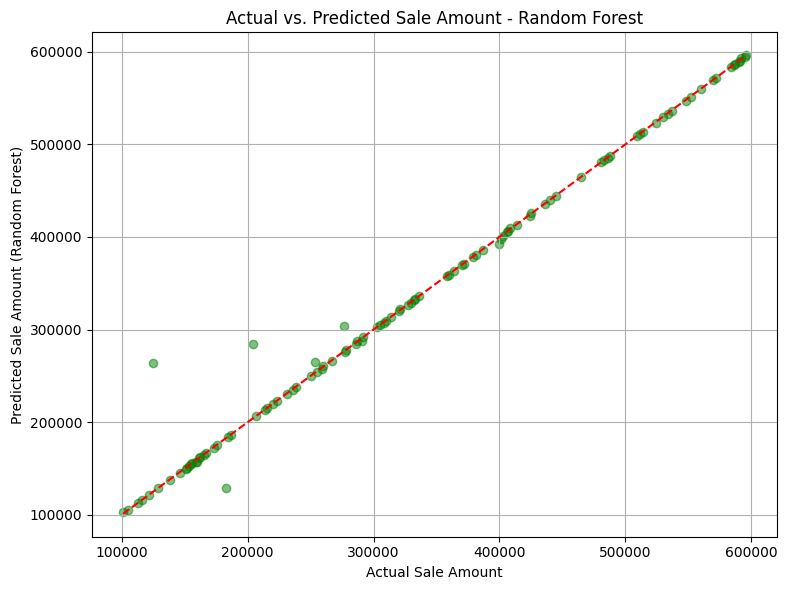

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Random Forest)")
plt.title("Actual vs. Predicted Sale Amount - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs. Predicted Sale Amount (Random Forest)
This cell creates a scatter plot to visualize the relationship between actual and predicted sale amounts using the Random Forest model.

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor MSE: {mse_dt:.2f}")
print(f"Decision Tree Regressor MAE: {mae_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Decision Tree Regressor R² Score: {r2_dt:.2f}")

Decision Tree Regressor MSE: 617507392.27
Decision Tree Regressor MAE: 5996.88
Root Mean Squared Error (RMSE): 24849.70
Decision Tree Regressor R² Score: 0.97


# Train and Evaluate Decision Tree Regressor
This cell trains a Decision Tree Regressor and evaluates its performance using metrics such as MSE, MAE, RMSE, and R² score.

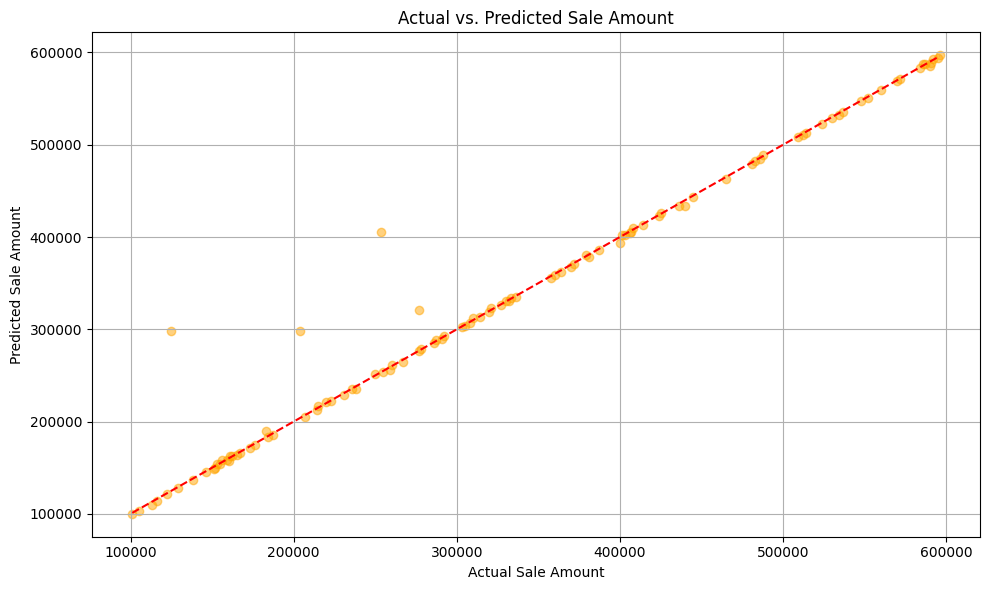

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount")
plt.title("Actual vs. Predicted Sale Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs. Predicted Sale Amount (Decision Tree)
This cell creates a scatter plot to visualize the relationship between actual and predicted sale amounts using the Decision Tree model.

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting Regressor MSE: {mse_gb:.2f}")
print(f"Gradient Boosting Regressor MAE: {mae_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"Gradient Boosting Regressor R² Score: {r2_gb:.2f}")

Gradient Boosting Regressor MSE: 500546726.43
Gradient Boosting Regressor MAE: 4878.03
Root Mean Squared Error (RMSE): 22372.90
Gradient Boosting Regressor R² Score: 0.98


# Train and Evaluate Gradient Boosting Regressor
This cell trains a Gradient Boosting Regressor and evaluates its performance using metrics such as MSE, MAE, RMSE, and R² score.

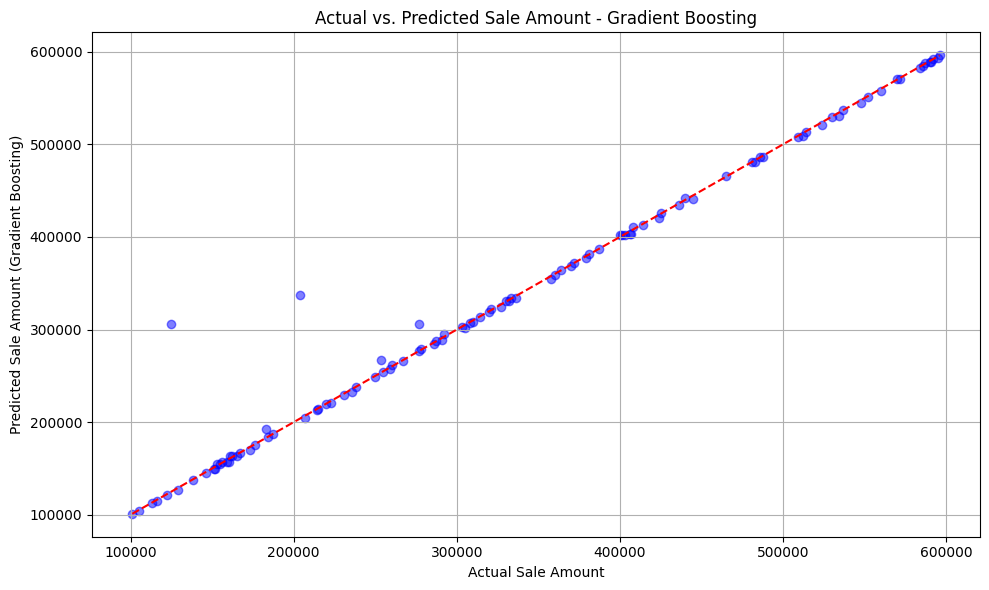

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sale Amount")
plt.ylabel("Predicted Sale Amount (Gradient Boosting)")
plt.title("Actual vs. Predicted Sale Amount - Gradient Boosting")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Actual vs. Predicted Sale Amount (Gradient Boosting)
This cell creates a scatter plot to visualize the relationship between actual and predicted sale amounts using the Gradient Boosting model.

# End of Notebook
This cell marks the end of the notebook. All major steps in data processing, cleaning, feature engineering, and modeling have been completed.